In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('./datasett_oppgave2.csv')

label_encoder = LabelEncoder()

# test 
print(df['cp'])

# Automatically transform all categorical columns to numerical values
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])



0       typical angina
1         asymptomatic
2         asymptomatic
3          non-anginal
4      atypical angina
            ...       
915       asymptomatic
916     typical angina
917       asymptomatic
918       asymptomatic
919    atypical angina
Name: cp, Length: 920, dtype: object


In [3]:
# test code



print(df['cp']) 

0      3
1      0
2      0
3      2
4      1
      ..
915    0
916    3
917    0
918    0
919    1
Name: cp, Length: 920, dtype: int64


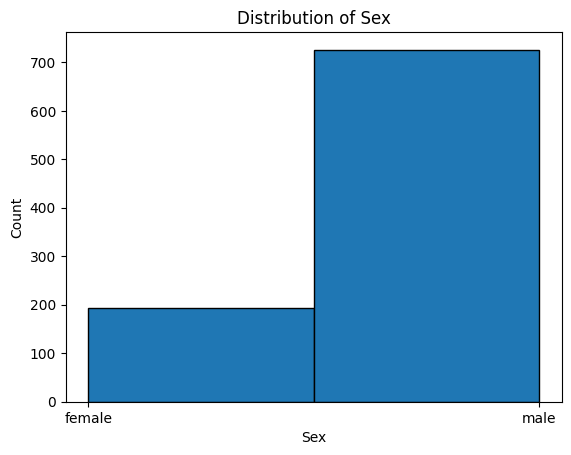

In [4]:
# Lager plot av kjønn
ax = df['sex'].plot(kind='hist',bins=2, edgecolor='black')

# Bytter ut 0 og 1 med male og female for å gjøre det mer leselig
ax.set_xticks([0, 1])
ax.set_xticklabels(['female', 'male'])

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

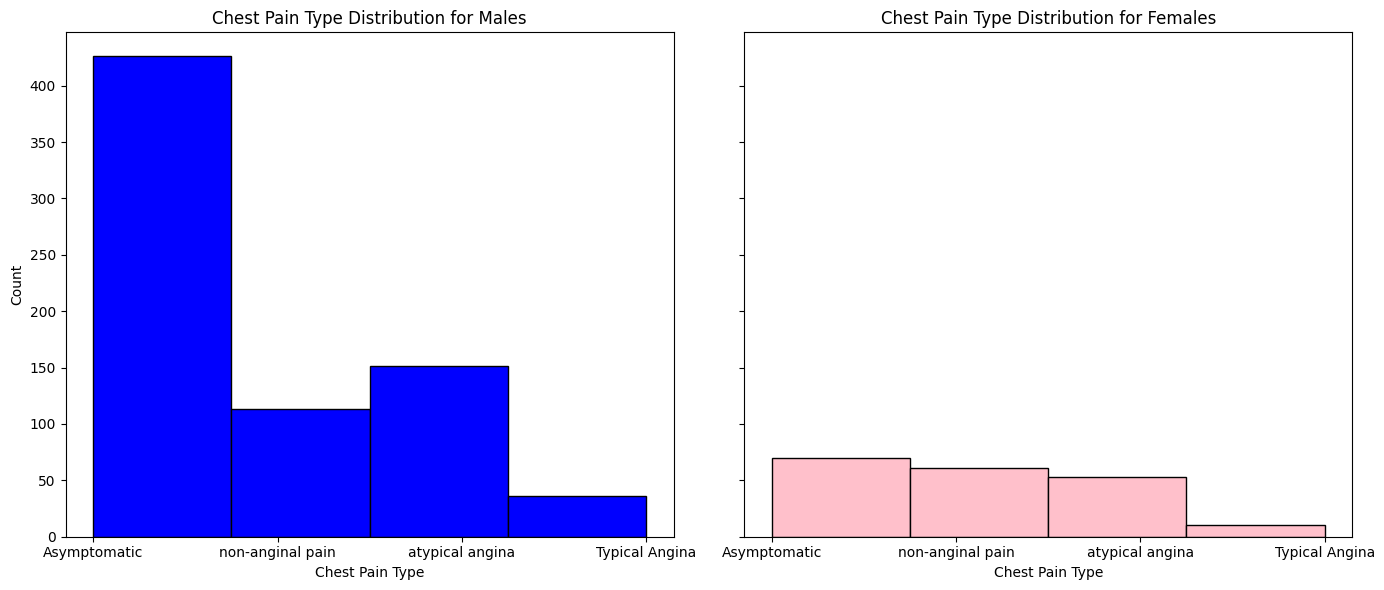

In [5]:
# Separate the data for males and females
df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 0]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# 3 = typical angina
# 2 = atypical angina
# 1 = non-anginal pain
# 0 = asymptomatic 

# Plot for males
df_male['cp'].plot(kind='hist', bins=4, ax=axes[0], color='blue', edgecolor='black')
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['Asymptomatic', 'non-anginal pain', 'atypical angina', 'Typical Angina'])
axes[0].set_title('Chest Pain Type Distribution for Males')
axes[0].set_xlabel('Chest Pain Type')
axes[0].set_ylabel('Count')

# Plot for females
df_female['cp'].plot(kind='hist', bins=4, ax=axes[1], color='pink', edgecolor='black')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['Asymptomatic', 'non-anginal pain', 'atypical angina', 'Typical Angina'])
axes[1].set_title('Chest Pain Type Distribution for Females')
axes[1].set_xlabel('Chest Pain Type')

plt.tight_layout()
plt.show()

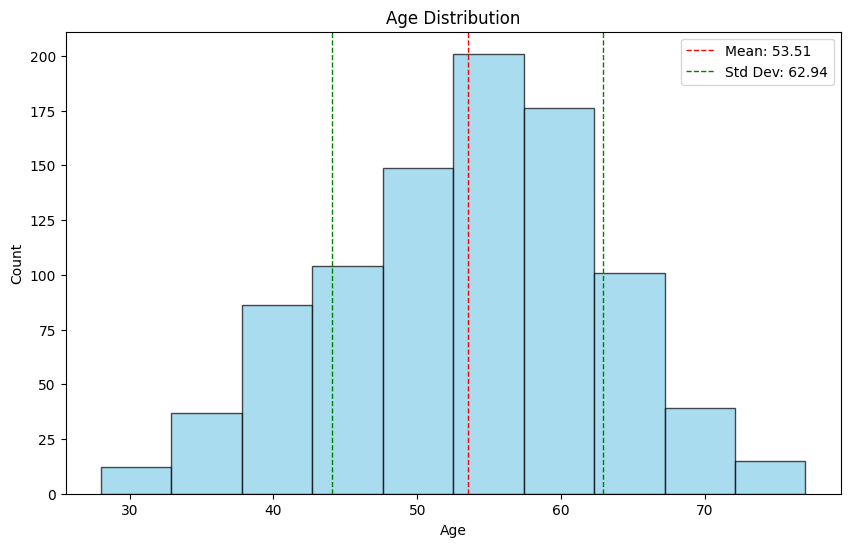

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean and standard deviation of the 'age' column
mean_age = df['age'].mean()
std_age = df['age'].std()

# Create a histogram for the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, edgecolor='black', color='skyblue', alpha=0.7)

# Add vertical lines for the mean and standard deviation
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(mean_age + std_age, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {mean_age + std_age:.2f}')
plt.axvline(mean_age - std_age, color='green', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.legend()

# Show the plot
plt.show()

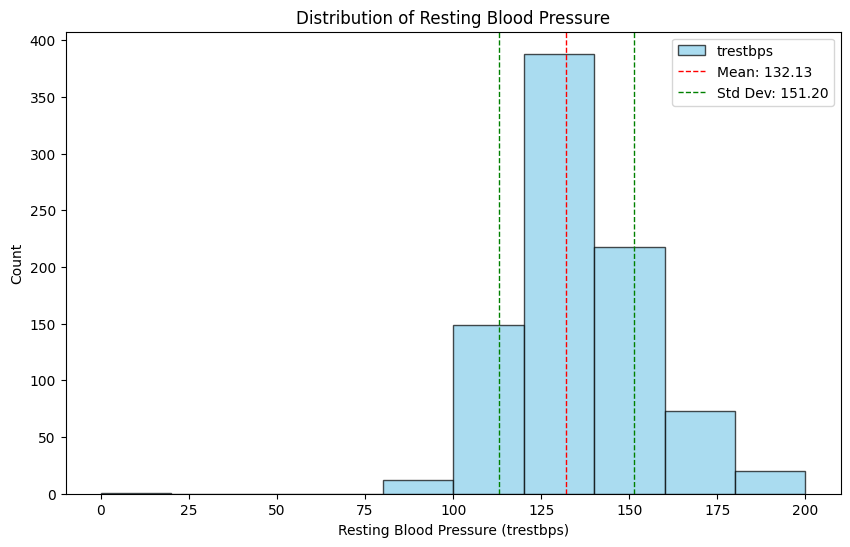

In [7]:
# Plot the distribution of resting blood pressure (trestbps)
plt.figure(figsize=(10, 6))
df['trestbps'].plot(kind='hist', bins=10, edgecolor='black', color='skyblue', alpha=0.7)

# Calculate the mean and standard deviation of the 'trestbps' column
mean_trestbps = df['trestbps'].mean()
std_trestbps = df['trestbps'].std()

# Add vertical lines for the mean and standard deviation
plt.axvline(mean_trestbps, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_trestbps:.2f}')
plt.axvline(mean_trestbps + std_trestbps, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {mean_trestbps + std_trestbps:.2f}')
plt.axvline(mean_trestbps - std_trestbps, color='green', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Count')
plt.title('Distribution of Resting Blood Pressure')
plt.legend()

# Show the plot
plt.show()


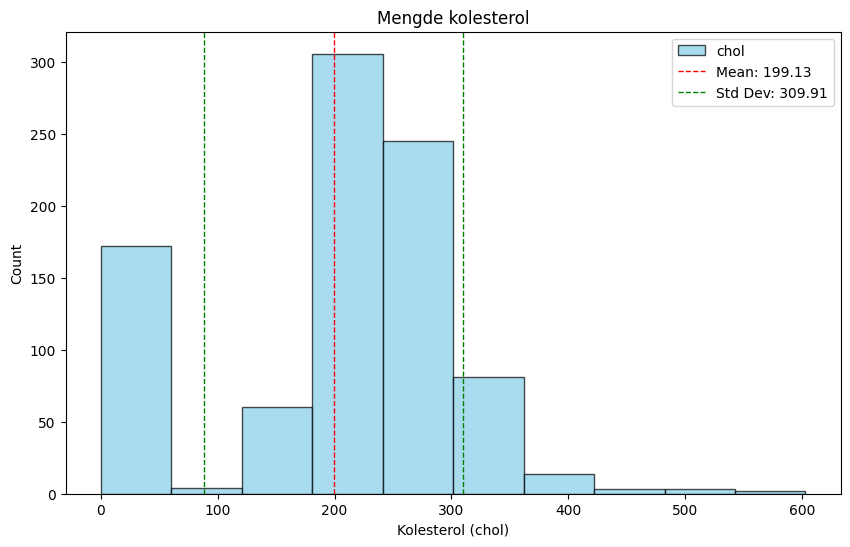

In [8]:
# Plot the distribution of cholesterol (chol)
plt.figure(figsize=(10, 6))
df['chol'].plot(kind='hist', bins=10, edgecolor='black', color='skyblue', alpha=0.7)

# Calculate the mean and standard deviation of the 'chol' column
mean_chol = df['chol'].mean()
std_chol = df['chol'].std()

# Add vertical lines for the mean and standard deviation
plt.axvline(mean_chol, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_chol:.2f}')
plt.axvline(mean_chol + std_chol, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {mean_chol + std_chol:.2f}')
plt.axvline(mean_chol - std_chol, color='green', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Kolesterol (chol)')
plt.ylabel('Count')
plt.title('Mengde kolesterol')
plt.legend()

# Show the plot
plt.show()

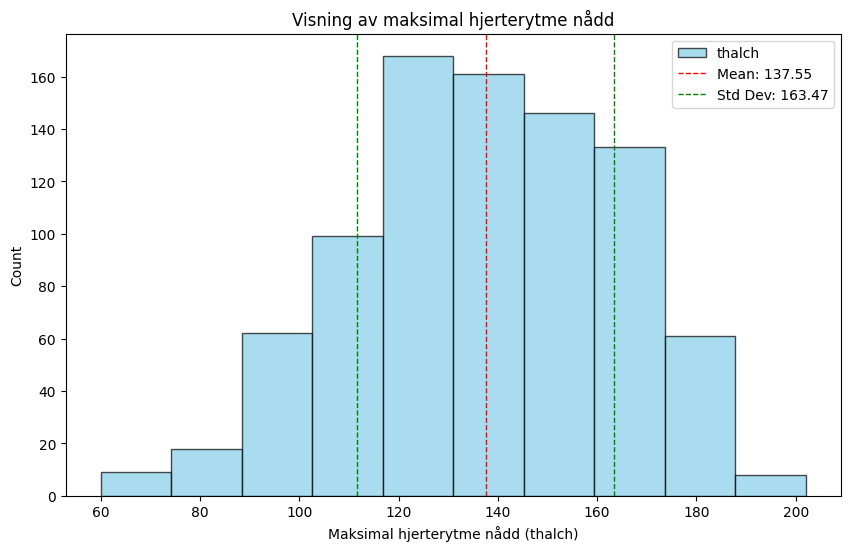

In [9]:
# Plot the distribution of maximum heart rate achieved (thalch)
plt.figure(figsize=(10, 6))
df['thalch'].plot(kind='hist', bins=10, edgecolor='black', color='skyblue', alpha=0.7)

# Calculate the mean and standard deviation of the 'thalch' column
mean_thalch = df['thalch'].mean()
std_thalch = df['thalch'].std()

# Add vertical lines for the mean and standard deviation
plt.axvline(mean_thalch, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_thalch:.2f}')
plt.axvline(mean_thalch + std_thalch, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {mean_thalch + std_thalch:.2f}')
plt.axvline(mean_thalch - std_thalch, color='green', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Maksimal hjerterytme nådd (thalch)')
plt.ylabel('Count')
plt.title('Visning av maksimal hjerterytme nådd')
plt.legend()

# Show the plot
plt.show()

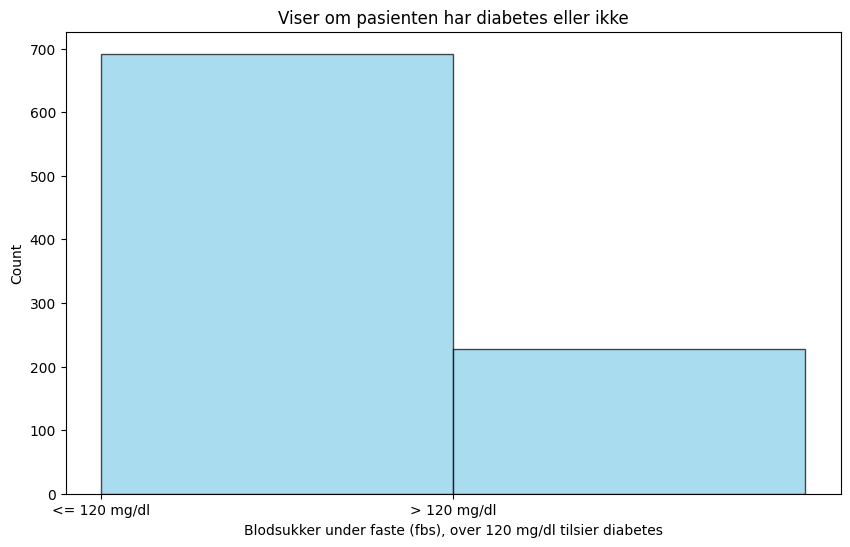

In [10]:
# Plot the distribution of fasting blood sugar (fbs)
# if fbs > 120 mg/dl, then they have diabetes
plt.figure(figsize=(10, 6))
df['fbs'].plot(kind='hist', bins=2, edgecolor='black', color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Blodsukker under faste (fbs), over 120 mg/dl tilsier diabetes')
plt.ylabel('Count')
plt.title('Viser om pasienten har diabetes eller ikke')
plt.xticks([0, 1], ['<= 120 mg/dl', '> 120 mg/dl'])

# Show the plot
plt.show()

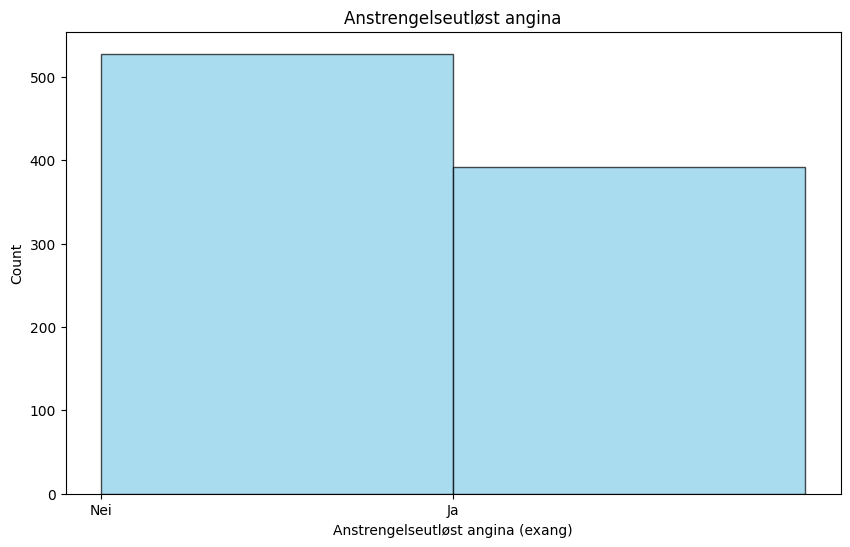

In [11]:
# Plot the distribution of exercise induced angina (exang)
plt.figure(figsize=(10, 6))
df['exang'].plot(kind='hist', bins=2, edgecolor='black', color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Anstrengelseutløst angina (exang)')
plt.ylabel('Count')
plt.title('Anstrengelseutløst angina')
plt.xticks([0, 1], ['Nei', 'Ja'])

# Show the plot
plt.show()

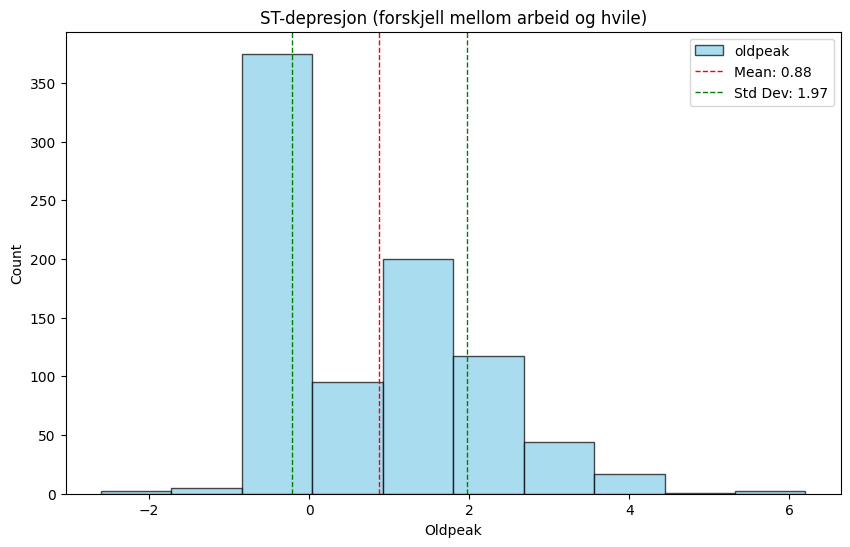

In [12]:
# Plot the distribution of oldpeak
plt.figure(figsize=(10, 6))
df['oldpeak'].plot(kind='hist', bins=10, edgecolor='black', color='skyblue', alpha=0.7)

# Calculate the mean and standard deviation of the 'oldpeak' column
mean_oldpeak = df['oldpeak'].mean()
std_oldpeak = df['oldpeak'].std()

# Add vertical lines for the mean and standard deviation
plt.axvline(mean_oldpeak, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_oldpeak:.2f}')
plt.axvline(mean_oldpeak + std_oldpeak, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {mean_oldpeak + std_oldpeak:.2f}')
plt.axvline(mean_oldpeak - std_oldpeak, color='green', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.title('ST-depresjon (forskjell mellom arbeid og hvile)')
plt.legend()

# Show the plot
plt.show()

In [13]:
import plotly.express as px
import numpy as np
import pandas as pd

#Drope id
df_no_id = df.drop('id', axis=1)

# Calculate the correlation matrix
corr_matrix = df_no_id.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_masked = corr_matrix.mask(mask)

# Create a heatmap of the correlation matrix using plotly
fig = px.imshow(corr_matrix_masked, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='RdBu_r', 
                title='Correlation Matrix Heatmap')

# Show the plot
fig.show()

In [18]:
# Print the rows with NaN values in the 'chol' column
nan_chol_rows = df[df['chol'].isna()]
print(nan_chol_rows)
# Print the rows where 'chol' is 0
chol_zero_rows = df[df['chol'] == 0]
print(chol_zero_rows)

      id  age  sex  dataset  cp  trestbps  chol  fbs  restecg  thalch  exang  \
305  306   29    1        1   1     140.0   NaN    0        1   170.0      0   
334  335   39    1        1   1     120.0   NaN    0        2   146.0      0   
337  338   39    1        1   1     130.0   NaN    0        1   120.0      0   
347  348   40    1        1   2     140.0   NaN    0        1   188.0      0   
368  369   43    0        1   2     150.0   NaN    0        1   175.0      0   
375  376   45    0        1   1     180.0   NaN    0        1   180.0      0   
378  379   45    1        1   2     135.0   NaN    0        1   110.0      0   
389  390   47    0        1   2     130.0   NaN    0        1   145.0      0   
394  395   48    0        1   1     120.0   NaN    1        2   148.0      0   
400  401   48    1        1   1     100.0   NaN    0        1   100.0      0   
404  405   49    0        1   1     110.0   NaN    0        1   160.0      0   
405  406   49    0        1   1     110.

NaN values in df_male_clean['chol']: 0
NaN values in df_female_clean['chol']: 0
Number of rows in df_male_clean: 703
Number of rows in df_female_clean: 187
Test Statistic: -6.00
P-value: 1.0000


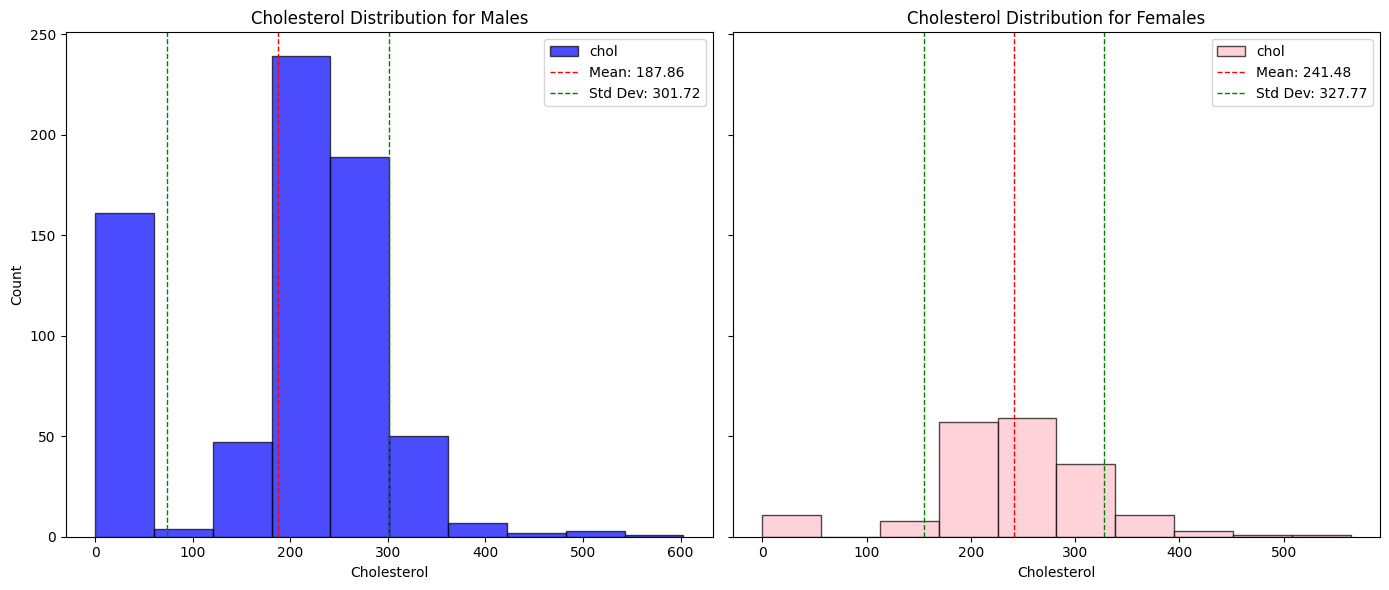

In [19]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Drop NaN values in the 'chol' columns
df_male_clean = df_male['chol'].dropna()
df_female_clean = df_female['chol'].dropna()

# Calculate the mean and standard deviation of the 'chol' column for males and females
mean_chol_male = df_male_clean.mean()
std_chol_male = df_male_clean.std()
mean_chol_female = df_female_clean.mean()
std_chol_female = df_female_clean.std()

# Create subplots for cholesterol distribution for males and females
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot for males
df_male_clean.plot(kind='hist', bins=10, ax=axes[0], color='blue', edgecolor='black', alpha=0.7)
axes[0].axvline(mean_chol_male, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_chol_male:.2f}')
axes[0].axvline(mean_chol_male + std_chol_male, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {mean_chol_male + std_chol_male:.2f}')
axes[0].axvline(mean_chol_male - std_chol_male, color='green', linestyle='dashed', linewidth=1)
axes[0].set_title('Cholesterol Distribution for Males')
axes[0].set_xlabel('Cholesterol')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot for females
df_female_clean.plot(kind='hist', bins=10, ax=axes[1], color='pink', edgecolor='black', alpha=0.7)
axes[1].axvline(mean_chol_female, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_chol_female:.2f}')
axes[1].axvline(mean_chol_female + std_chol_female, color='green', linestyle='dashed', linewidth=1, label=f'Std Dev: {mean_chol_female + std_chol_female:.2f}')
axes[1].axvline(mean_chol_female - std_chol_female, color='green', linestyle='dashed', linewidth=1)
axes[1].set_title('Cholesterol Distribution for Females')
axes[1].set_xlabel('Cholesterol')
axes[1].legend()

# Perform a one-sided t-test for the hypothesis that cholesterol is higher in males than in females
t_stat, p_value = ttest_ind(df_male_clean, df_female_clean, alternative='greater')

# Print the test statistic and p-value
print(f'Test Statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')
plt.tight_layout()
plt.show()